In [2]:
from modeling.run_model import *
import os
from modeling.lda import *


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aneel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aneel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
with open("../resources/ALL_TEXT.txt", 'r', encoding='utf-8') as f:
    text = f.read().splitlines()

all_tokens = list()
for line in text:
    all_tokens.append(prepare_text_for_lda(line))
dictionary = corpora.Dictionary(all_tokens)
corpus = [dictionary.doc2bow(text) for text in all_tokens]

# pickle.dump(corpus, open('corpus.pkl', 'wb'))
# dictionary.save('dictionary.gensim')
NUM_TOPICS = 15
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)



In [57]:
ldamodel.save('alltext15.gensim')
topics = ldamodel.print_topics(num_words=4)
print(topics)


[(0, '0.134*"million" + 0.098*"month" + 0.084*"end" + 0.049*"three"'), (1, '0.118*"financial" + 0.081*"statement" + 0.080*"consolidate" + 0.047*"report"'), (2, '0.046*"business" + 0.033*"product" + 0.031*"could" + 0.029*"result"'), (3, '0.057*"contract" + 0.050*"obligation" + 0.045*"customer" + 0.043*"revenue"'), (4, '0.083*"lease" + 0.033*"accounting" + 0.029*"company" + 0.028*"standard"'), (5, '0.105*"sales" + 0.076*"increase" + 0.057*"revenue" + 0.034*"gross"'), (6, '0.036*"party" + 0.033*"software" + 0.030*"component" + 0.029*"supplier"'), (7, '0.078*"account" + 0.077*"security" + 0.045*"capital" + 0.038*"pursuant"'), (8, '0.046*"interest" + 0.042*"investment" + 0.034*"equity" + 0.032*"losses"'), (9, '0.054*"corporation" + 0.047*"foreign" + 0.046*"currency" + 0.035*"subsidiary"'), (10, '0.103*"share" + 0.095*"stock" + 0.046*"common" + 0.044*"repurchase"'), (11, '0.070*"assets" + 0.052*"value" + 0.041*"liabilities" + 0.030*"measure"'), (12, '0.095*"quarter" + 0.087*"fiscal" + 0.062*

In [58]:
from gensim.models import LdaModel
test = LdaModel.load('alltext15.gensim')

In [60]:
topics = test.print_topics(num_words=4)
print(topics)

[(0, '0.134*"million" + 0.098*"month" + 0.084*"end" + 0.049*"three"'), (1, '0.118*"financial" + 0.081*"statement" + 0.080*"consolidate" + 0.047*"report"'), (2, '0.046*"business" + 0.033*"product" + 0.031*"could" + 0.029*"result"'), (3, '0.057*"contract" + 0.050*"obligation" + 0.045*"customer" + 0.043*"revenue"'), (4, '0.083*"lease" + 0.033*"accounting" + 0.029*"company" + 0.028*"standard"'), (5, '0.105*"sales" + 0.076*"increase" + 0.057*"revenue" + 0.034*"gross"'), (6, '0.036*"party" + 0.033*"software" + 0.030*"component" + 0.029*"supplier"'), (7, '0.078*"account" + 0.077*"security" + 0.045*"capital" + 0.038*"pursuant"'), (8, '0.046*"interest" + 0.042*"investment" + 0.034*"equity" + 0.032*"losses"'), (9, '0.054*"corporation" + 0.047*"foreign" + 0.046*"currency" + 0.035*"subsidiary"'), (10, '0.103*"share" + 0.095*"stock" + 0.046*"common" + 0.044*"repurchase"'), (11, '0.070*"assets" + 0.052*"value" + 0.041*"liabilities" + 0.030*"measure"'), (12, '0.095*"quarter" + 0.087*"fiscal" + 0.062*

In [62]:
VALIDATION_SET_PATH = "../resources/validation_set"

best_topics = list()
valid_vectors = list
for root, dirs, files in os.walk(VALIDATION_SET_PATH):
    for file in files:
        doc_topics = np.zeros(15)
        with open(os.path.join(VALIDATION_SET_PATH,file), 'r', encoding='utf-8') as f:
            validation_doc = f.read().splitlines()
        for line in validation_doc:
            new_doc = prepare_text_for_lda(line)
            new_doc_bow = dictionary.doc2bow(new_doc)
            tmax = np.argmax([two for one, two in ldamodel.get_document_topics(new_doc_bow)])
            sent_topic = ldamodel.get_document_topics(new_doc_bow)[tmax][0]
            doc_topics[sent_topic] += 1
        print(doc_topics)
        doc_topics = doc_topics/np.linalg.norm(doc_topics)
        best_topics.append(doc_topics)


[0. 0. 4. 0. 1. 3. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
[3. 0. 8. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3.]
[4. 0. 2. 1. 1. 6. 3. 1. 0. 0. 0. 2. 2. 0. 8.]
[3. 0. 6. 2. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 3.]
[1. 0. 0. 1. 1. 2. 1. 1. 0. 0. 0. 0. 0. 2. 3.]
[0. 1. 2. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 7.]
[1. 0. 2. 0. 0. 3. 0. 0. 0. 2. 1. 0. 1. 0. 6.]
[5. 0. 3. 0. 0. 4. 3. 0. 0. 1. 0. 0. 1. 3. 6.]


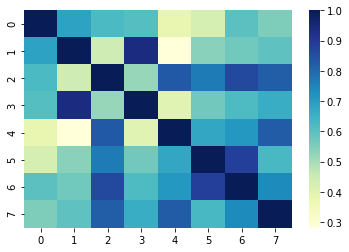

In [56]:
from sklearn import metrics
import seaborn as sns
cosine = metrics.pairwise.cosine_similarity(best_topics)
sns.heatmap(cosine,cmap="YlGnBu")

